In [0]:
import sys, os, shutil
from glob import glob
import numpy as np

## Change Runtime on Colab

## Get Data

In [0]:
def chdir_home():
    pwd = !pwd
    if pwd[0].count('/') > 1 :
        os.chdir((pwd[0].count('/')-1)*'../')

In [6]:
# Download in home directory
chdir_home()
!kg download -u skakki -p akshaykumar -c dogs-vs-cats-redux-kernels-edition

downloading https://www.kaggle.com/c/dogs-vs-cats-redux-kernels-edition/download/test.zip

test.zip 100% |######################################| Time: 0:00:06  40.2 MiB/s

downloading https://www.kaggle.com/c/dogs-vs-cats-redux-kernels-edition/download/train.zip

train.zip 100% |#####################################| Time: 0:00:13  40.7 MiB/s

downloading https://www.kaggle.com/c/dogs-vs-cats-redux-kernels-edition/download/sample_submission.csv

sample_submission.csv 100% |#########################| Time: 0:00:00 576.6 KiB/s



In [0]:
!mkdir -p data/redux
!unzip train.zip -d data/redux
!unzip test.zip -d data/redux

In [0]:
!mkdir -p data/redux/test/unknown/
!mkdir -p data/redux/train/cats
!mkdir -p data/redux/train/dogs
!mkdir -p data/redux/valid/cats
!mkdir -p data/redux/valid/dogs
!mkdir -p data/redux/results

!mkdir -p data/redux/sample/train/cats
!mkdir -p data/redux/sample/train/dogs
!mkdir -p data/redux/sample/valid/cats
!mkdir -p data/redux/sample/valid/dogs
!mkdir -p data/redux/sample/test/unknown
!mkdir -p data/redux/sample/results

In [0]:
# these paths are when you are at home directory
chdir_home()

path = 'data/redux/'
# path = 'data/redux/sample/'

train_path = path+'train/'
val_path = path+'valid/'
test_path = path+'test/'
sample_path = path+'sample/'
results_path = path+'results/'
model_path = path+'models/'
if not os.path.exists(model_path): os.mkdir(model_path)

In [0]:
# copy 1200 images from train and 600 from test to sample
g = glob(train_path+'*.jpg')
g = np.random.permutation(g)
for i in range(1200):
    shutil.copy(g[i], sample_path+'train/')

g = glob(test_path+'*.jpg')
g = np.random.permutation(g)
for i in range(600):
    shutil.copy(g[i], sample_path+'test/')


# Move 100 images from sample/train to sample/valid
g = glob(sample_path+'train/*.jpg')
g = np.random.permutation(g)
for i in range(100):
    shutil.move(g[i], sample_path+'valid/')


# move 2000 images from train to valid directory

g = glob(train_path+'*.jpg')
g = np.random.permutation(g)
for i in range(2000):
    shutil.move(g[i], val_path)



In [0]:
# move image in corresponsing label directories

!mv sample_submission.csv data/redux/

!mv data/redux/test/*.jpg data/redux/test/unknown/
!mv data/redux/train/cat*.jpg data/redux/train/cats/
!mv data/redux/train/dog*.jpg data/redux/train/dogs/
!mv data/redux/valid/dog*.jpg data/redux/valid/dogs/
!mv data/redux/valid/cat*.jpg data/redux/valid/cats/

!mv data/redux/sample/valid/cat*.jpg data/redux/sample/valid/cats/
!mv data/redux/sample/valid/dog*.jpg data/redux/sample/valid/dogs/
!mv data/redux/sample/train/cat*.jpg data/redux/sample/train/cats/
!mv data/redux/sample/train/dog*.jpg data/redux/sample/train/dogs/
!mv data/redux/sample/test/*.jpg data/redux/sample/test/unknown/


In [23]:
!tree data/ -d

data/
└── redux
    ├── models
    ├── results
    ├── sample
    │   ├── results
    │   ├── test
    │   │   └── unknown
    │   ├── train
    │   │   ├── cats
    │   │   └── dogs
    │   └── valid
    │       ├── cats
    │       └── dogs
    ├── test
    │   └── unknown
    ├── train
    │   ├── cats
    │   └── dogs
    └── valid
        ├── cats
        └── dogs

21 directories


## Install Packages

Following packages need to installed everytime. Also first change directory to the location where this notebook is located. 

In [0]:
!pip install tqdm
!pip install bcolz
!pip install keras==1.2

In [0]:
# theano and libgpu installation 

# !pip install theano

# ! git clone https://github.com/Theano/libgpuarray.git
# !mkdir -p libgpuarray/Build/
# os.chdir('libgpuarray/Build')

# !apt-get install -y cmake
# ! cmake .. -DCMAKE_BUILD_TYPE=Release
# ! make
# ! make install

# ! pip install --upgrade cython
# os.chdir('../')
# !python setup.py build
# !python setup.py install
# os.chdir('../')


## Utility functions

Now that we have organised our data lets finetune VGG16 model. 

## Finetune using VGG

In [0]:
# change directory so that python can find utils and other files
chdir_home()
os.chdir('drive/workspace/Dogs-Cats-Redux/')

In [0]:
%matplotlib inline
import sys, os, shutil
from glob import glob
import numpy as np
# from utils import *
# from vgg16 import Vgg16
from PIL import Image
from keras.preprocessing import image
from sklearn.metrics import confusion_matrix
from IPython.display import FileLink

In [0]:
batch_size=64
no_epochs=2

chdir_home()
# path = 'data/redux/'
path = 'data/redux/sample/'

train_path = path+'train/'
val_path = path+'valid/'
test_path = path+'test/'
results_path = path+'results/'

In [0]:
vgg = Vgg16()
train_batches = vgg.get_batches(train_path, batch_size=batch_size)
val_batches = vgg.get_batches(val_path, batch_size=batch_size)
vgg.finetune(train_batches)

Found 800 images belonging to 2 classes.
Found 75 images belonging to 2 classes.


In [0]:
latest_weights_filename = None
for epoch in range(no_epochs):
    print ("\nRunning Epoch :  {0}".format(epoch))
    vgg.fit(train_batches, val_batches, nb_epoch=1)
    latest_weights_filename = "ft{0}.h5".format(epoch)
    vgg.model.save_weights(results_path+latest_weights_filename)
print ("Completed {0} fit operation\n".format(no_epochs))


Running Epoch :  0
Epoch 1/1
800/800 [==============================] - 17s - loss: 0.8919 - acc: 0.6938 - val_loss: 0.2141 - val_acc: 0.9067

Running Epoch :  1
Epoch 1/1
800/800 [==============================] - 16s - loss: 0.4825 - acc: 0.8525 - val_loss: 0.2267 - val_acc: 0.8800
Completed 2 fit operation



In [0]:
for epoch in range(no_epochs):
    print ("Epoch {0}".format(epoch))
    vgg.model.load_weights(filepath=results_path+'ft{0}.h5'.format(epoch))
    test_batches, test_preds = vgg.test(test_path, batch_size=batch_size)
    isdog = test_preds[:,1]
    isdog = isdog.clip(min=0.05, max=0.95)
    test_filenames = test_batches.filenames
    test_file_ids = [int(f[8:-4]) for f in test_filenames]
    subm = np.stack([test_file_ids, isdog], axis=1)
    subm_filename = "submission{0}.csv".format(epoch)
    np.savetxt(subm_filename, subm, fmt='%d,%0.5f', header='id,label', comments='')

Epoch 0
Found 12500 images belonging to 1 classes.
Epoch 1
Found 12500 images belonging to 1 classes.
Epoch 2
Found 12500 images belonging to 1 classes.


In [0]:
FileLink('submission3.csv')

/home/akshay/workspace/redux/submission3.csv

# Finetune from Scratch

In [0]:
# I have commented out import utils i above section so that we can manually import packages here. 
chdir_home()
os.chdir('drive/workspace/Dogs-Cats-Redux/')

from vgg16 import Vgg16
import utils
from utils import *
from keras.models import Sequential
from keras.layers import Dense
from keras.utils.np_utils import to_categorical
from keras.optimizers import RMSprop

import bcolz
from sklearn.preprocessing import OneHotEncoder
chdir_home()

In [0]:
# path = 'data/redux/'
path = 'data/redux/sample/'

train_path = path+'train/'
val_path = path+'valid/'
test_path = path+'test/'
results_path = path+'results/'
model_path = path+'models/'
if not os.path.exists(model_path): os.mkdir(model_path)


In [0]:
batch_size=64
no_epochs = 3

In [0]:
vgg = Vgg16()
model = vgg.model

In [74]:
val_batches = get_batches(val_path, batch_size=batch_size, shuffle=False)
train_batches = get_batches(train_path, batch_size=batch_size, shuffle=False)

Found 100 images belonging to 2 classes.
Found 1100 images belonging to 2 classes.


In [0]:
def save_array(fname, crr): 
    c=bcolz.carray(crr, rootdir=fname, mode='w')
    c.flush()

def load_array(fname):
    return bcolz.open(fname)


We will not get the full data using get_data function as concatenating all the batchs causes out of memory error. 

In [76]:
# train_data = get_data(train_path)
# val_data = get_data(val_path)
# save_array(model_path+'val_data.bc', val_data)
# save_array(model_path+'train_data.bc', train_data)


  1%|          | 10/1100 [00:00<00:11, 98.13it/s]

Found 1100 images belonging to 2 classes.


 10%|█         | 10/100 [00:00<00:00, 91.07it/s]

Found 100 images belonging to 2 classes.


100%|██████████| 100/100 [00:01<00:00, 89.48it/s]


In [0]:
# train_data = load_array(model_path+'train_data.bc')
# val_data = load_array(model_path+'val_data.bc')

In [0]:
train_classes = train_batches.classes
val_classes = val_batches.classes
train_labels = to_categorical(train_classes, train_batches.nb_class)
val_labels = to_categorical(val_classes, val_batches.nb_class)

In [0]:
train_feat = model.predict_generator(train_batches, train_batches.nb_sample)
val_feat = model.predict_generator(val_batches, val_batches.nb_sample)

# train_feat = model.predict(train_data, batch_size=batch_size)
# val_feat = model.predict(val_data, batch_size=batch_size)

In [0]:
save_array(model_path+'train_feat.bc', train_feat)
save_array(model_path+'val_feat.bc', val_feat)

In [0]:
train_feat = load_array(model_path+'train_feat.bc')
val_feat = load_array(model_path+'val_feat.bc')


Now let's define a linear model to append to vgg16. 

In [0]:
lm = Sequential([ Dense(2, activation='softmax', input_shape=(1000,)) ])
lm.compile(optimizer=RMSprop(lr=0.1), loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
# Here you can experiment with batch size
batch_size=64

In [96]:
lm.fit(train_feat, train_labels, nb_epoch=20, validation_data=(val_feat, val_labels), batch_size=batch_size)

Train on 1100 samples, validate on 100 samples
Epoch 1/20
1100/1100 [==============================] - 0s - loss: 0.2274 - acc: 0.9145 - val_loss: 0.5063 - val_acc: 0.8500
Epoch 2/20
1100/1100 [==============================] - 0s - loss: 0.2226 - acc: 0.9118 - val_loss: 0.5253 - val_acc: 0.8600
Epoch 3/20
1100/1100 [==============================] - 0s - loss: 0.2156 - acc: 0.9155 - val_loss: 0.5355 - val_acc: 0.8700
Epoch 4/20
1100/1100 [==============================] - 0s - loss: 0.2087 - acc: 0.9227 - val_loss: 0.6029 - val_acc: 0.8600
Epoch 5/20
1100/1100 [==============================] - 0s - loss: 0.2089 - acc: 0.9200 - val_loss: 0.5845 - val_acc: 0.8700
Epoch 6/20
1100/1100 [==============================] - 0s - loss: 0.2032 - acc: 0.9218 - val_loss: 0.5818 - val_acc: 0.8800
Epoch 7/20
1100/1100 [==============================] - 0s - loss: 0.1992 - acc: 0.9291 - val_loss: 0.6348 - val_acc: 0.8500
Epoch 8/20
1100/1100 [==============================] - 0s - loss: 0.1967 - ac

1100/1100 [==============================] - 0s - loss: 0.1906 - acc: 0.9327 - val_loss: 0.6628 - val_acc: 0.8600
Epoch 11/20
1100/1100 [==============================] - 0s - loss: 0.1845 - acc: 0.9291 - val_loss: 0.7371 - val_acc: 0.8500
Epoch 12/20
1100/1100 [==============================] - 0s - loss: 0.1858 - acc: 0.9273 - val_loss: 0.7053 - val_acc: 0.8500
Epoch 13/20
1100/1100 [==============================] - 0s - loss: 0.1829 - acc: 0.9318 - val_loss: 0.7101 - val_acc: 0.8500
Epoch 14/20
1100/1100 [==============================] - 0s - loss: 0.1770 - acc: 0.9309 - val_loss: 0.7631 - val_acc: 0.8600
Epoch 15/20
1100/1100 [==============================] - 0s - loss: 0.1766 - acc: 0.9391 - val_loss: 0.7625 - val_acc: 0.8600
Epoch 16/20
1100/1100 [==============================] - 0s - loss: 0.1769 - acc: 0.9327 - val_loss: 0.7683 - val_acc: 0.8600
Epoch 17/20
1100/1100 [==============================] - 0s - loss: 0.1714 - acc: 0.9382 - val_loss: 0.7737 - val_acc: 0.8500
Epoc

1100/1100 [==============================] - 0s - loss: 0.1702 - acc: 0.9355 - val_loss: 0.7842 - val_acc: 0.8500
Epoch 19/20
1100/1100 [==============================] - 0s - loss: 0.1668 - acc: 0.9400 - val_loss: 0.8054 - val_acc: 0.8600
Epoch 20/20
1100/1100 [==============================] - 0s - loss: 0.1675 - acc: 0.9355 - val_loss: 0.8073 - val_acc: 0.8500


In [86]:
lm.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
dense_12 (Dense)                 (None, 2)             2002        dense_input_3[0][0]              
Total params: 2,002
Trainable params: 2,002
Non-trainable params: 0
____________________________________________________________________________________________________


### Viewing Predictions


In [87]:
preds = lm.predict_classes(val_feat, batch_size)
probs = lm.predict_proba(val_feat, batch_size)[:,0]

 64/100 [==================>...........] - ETA: 0s

In [88]:
probs[:5]

array([0.9419, 0.9999, 0.8327, 0.9969, 0.7942], dtype=float32)

In [0]:
filenames = val_batches.filenames
n_view = 4

In [0]:
def plot_idx(idx, titles=None):
    plots([Image.open(val_path+filenames[i]) for i in idx], titles=titles)

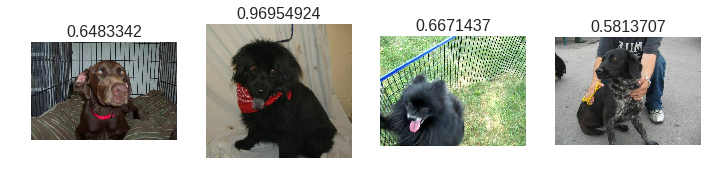

In [94]:
#  A few correct labels at random
correct = np.where(preds!=val_labels[:,1])[0]
idx = np.random.permutation(correct)[:n_view]
plot_idx(idx, titles=probs[idx])

14